In [25]:
# 라이브러리 로드 하기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [26]:
# 데이터셋 로드하기
df = sns.load_dataset("flights")
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [27]:
from datetime import datetime
year = 2020
month = "March"

s = f"{year} {month} 1"  
d = datetime.strptime(s, "%Y %B %d")
d.strftime("%Y-%m-%d")

'2020-03-01'

In [28]:
# datetime 함수를 만들어 date 형태로 반환
def find_datetime(row):
    year = row["year"]
    month = row["month"]
    
    s = f"{year} {month} 1"
    d = datetime.strptime(s, "%Y %b %d") # df 에서 month의 형태가 Jab로 %b로 받아야함
     
    return d.strftime("%Y-%m-%d")

In [29]:
df["date"] = df.apply(find_datetime, axis=1)
df

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01
...,...,...,...,...
139,1960,Aug,606,1960-08-01
140,1960,Sep,508,1960-09-01
141,1960,Oct,461,1960-10-01
142,1960,Nov,390,1960-11-01


In [30]:
import pandas as pd

df["date"] = df.apply(find_datetime, axis=1)
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: date, dtype: datetime64[ns]

In [31]:
df_date = df[["date", "passengers"]].set_index("date")
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(df_date)

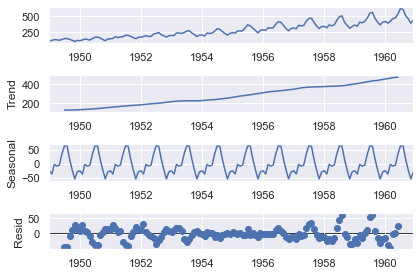

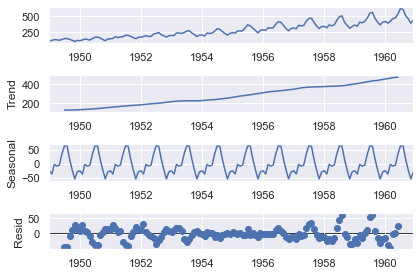

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date)
decomp.plot()

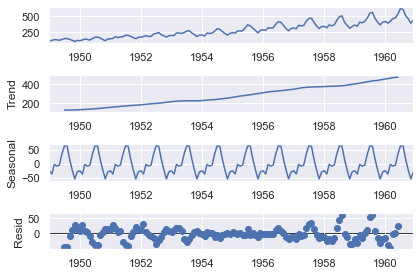

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df_date)
d = decomp.plot()

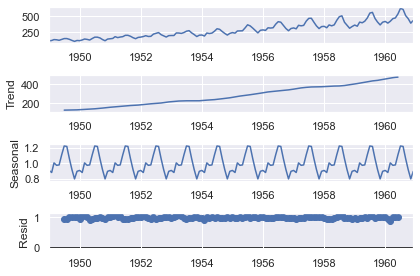

In [35]:
decomp = seasonal_decompose(df_date, model="multiplicative")
d = decomp.plot()